# Solve Online Advertising Problem with Thompson Sampling

## Create Environment

This code simulates an environment for online advertising using the concept of Bernoulli Bandits. In online advertising, companies often need to decide which ad to display to users in real-time to maximize their click-through rates (CTR) or other performance metrics. The Bernoulli Bandit model is a simplified framework that represents this problem.

### Code Description

#### Constructor:
- The `BernoulliBandit` class has a constructor `__init__(self, p)` that takes a single parameter `p`.
- The parameter `p` represents the probability of a user clicking on the ad when it is displayed. It is a value between 0 and 1.

#### Method: `display_ad()`
- The `display_ad()` method simulates displaying the ad to a user and returns the outcome of the ad display as a binary value (0 or 1).
- It uses the `numpy.random.binomial(n=1, p=self.p)` function to model the Bernoulli distribution with a single trial (n=1).
- The parameter `p` determines the probability of success (click) for the Bernoulli distribution.

In [1]:
import numpy as np

class BernoulliBandit:
    def __init__(self, p):
        self.p = p

    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

In this code, five different ads (`adA`, `adB`, `adC`, `adD`, and `adE`) are created as instances of the `BernoulliBandit` class, each with its own click-through probability (`p`). These probabilities represent how likely a user is to click on the respective ad when displayed.

The `ads` list contains all the ad instances, allowing for easy management and comparison of different ads.

In [2]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

In the context of online advertising, each ad instance in the ads list represents a different ad creative that the company wants to test. The goal is to determine which ad has the highest click-through rate (CTR) or conversion rate.

To simulate the online advertising process, the company can use the display_ad() method of each ad instance to obtain a reward (0 or 1) based on the Bernoulli distribution with the corresponding click-through probability. The company can then analyze the rewards obtained for each ad and use the results to make informed decisions about which ad(s) to display more frequently to maximize their overall performance.

## Thompson Sampling Algorithm for Multi-Armed Bandit Problem

The Thompson Sampling algorithm is a probabilistic approach to solving the Multi-Armed Bandit problem. It elegantly balances the exploration and exploitation trade-off by utilizing probability distributions to guide the selection of actions (arms) in an adaptive manner. This algorithm is particularly suitable for scenarios where the true reward distributions of the arms are uncertain and subject to change.

The fundamental idea behind Thompson Sampling is to maintain a belief about the true reward probabilities associated with each arm. This belief is represented using probability distributions. Instead of solely selecting the arm with the highest expected reward (exploitation), Thompson Sampling also considers the uncertainty in its beliefs. It selects arms probabilistically based on these beliefs, thus allowing exploration of potentially promising arms.

In this code, ad variations are treated as arms, and the algorithm dynamically adjusts its arm selection strategy based on observed rewards. It leverages the Beta distribution to capture uncertainty in the reward probabilities and make informed decisions. The code loops through a specified number of iterations (n_prod) and follows the algorithm steps described above. The resulting average rewards over time are stored in the avg_rewards list for analysis and visualization. Thompson Sampling is a powerful approach that naturally balances exploration and exploitation, making it an attractive solution for scenarios with uncertainty and changing reward distributions

### Algorithm Steps

#### 1. Initialization
- `n_prod` is the total number of iterations (time steps) to run the algorithm.
- `n_ads` represents the number of ad variations (arms).
- `alpahas` and `betas` are arrays to store the parameters of the Beta distribution for each arm. They are initialized with ones, which is a common initialization choice.

#### 2. Arm Selection
- The loop iterates through each time step.
- For each arm, a sample is drawn from a Beta distribution using the parameters from `alpahas` and `betas`. This sample represents the algorithm's belief about the arm's true reward probability (`theta`).
- The arm with the highest sampled `theta` is selected as the chosen arm (`ad_chosen`).

#### 3. Observing Rewards and Updating Parameters
- The chosen arm is displayed to users, and its reward is observed (`R`).
- The parameters `alpahas` and `betas` are updated based on the observed reward:
  - `alpahas` is increased by the reward (if the ad was successful).
  - `betas` is increased by the complement of the reward (if the ad was not successful).

#### 4. Calculating and Recording Rewards
- The total reward obtained so far is updated by adding the observed reward (`R`).
- The average reward obtained up to the current time step is calculated and stored in `avg_rewards_so_far`.
- The `avg_rewards_so_far` value is appended to the `avg_rewards` list, capturing the algorithm's performance over time.

In [3]:
n_prod = 100000
n_ads = len(ads)
alpahas = np.ones(n_ads)
betas = np.ones(n_ads)
total_reward = 0
avg_rewards = []

In [4]:
for i in range(n_prod):
    theta_samples = [np.random.beta(alpahas[k], betas[k]) for k in range(n_ads)]
    ad_chosen = np.argmax(theta_samples)
    R = ads[ad_chosen].display_ad()
    alpahas[ad_chosen] += R
    betas[ad_chosen] += 1 - R
    total_reward += R
    avg_rewards_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_rewards_so_far)

In [5]:
import pandas as pd

df_reward_comparison = pd.DataFrame()
df_reward_comparison['Thompson Sampling'] = avg_rewards

## Plot

In [ ]:
import cufflinks as cf

cf.go_offline()
cf.set_config_file(world_readable=True, theme="white")


df_reward_comparison['Thompson Sampling'].iplot(
    title="Thompson Sampling Avg. Reward: {:.4f}".format(avg_rewards_so_far), 
    xTitle='Impressions', 
    yTitle='Avg. Reward'
)

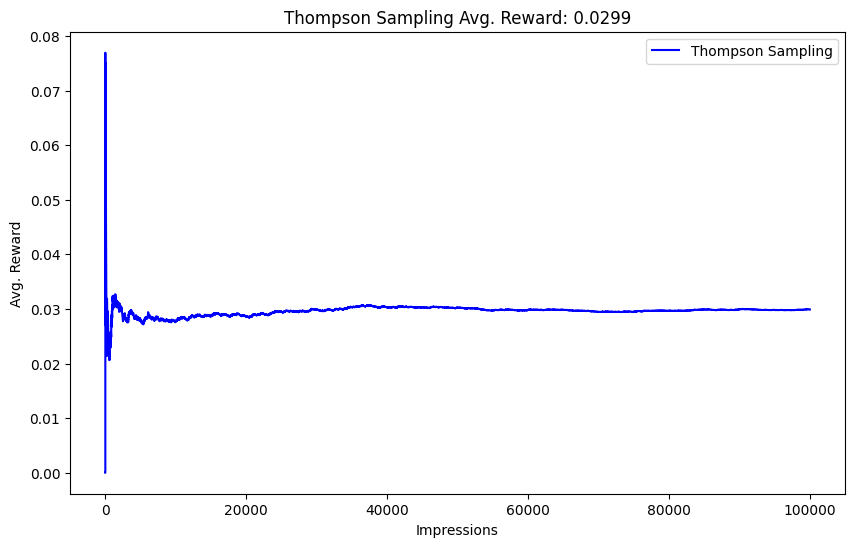

In [7]:
import matplotlib.pyplot as plt

# Extract Thompson Sampling rewards from DataFrame
thompson_rewards = df_reward_comparison['Thompson Sampling']

plt.figure(figsize=(10, 6))
plt.plot(thompson_rewards, label='Thompson Sampling', color='blue')
plt.title("Thompson Sampling Avg. Reward: {:.4f}".format(avg_rewards_so_far))
plt.xlabel('Impressions')
plt.ylabel('Avg. Reward')
plt.legend()
plt.show()